# Tarea 3

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

## Pregunta 1 

### 1.a)

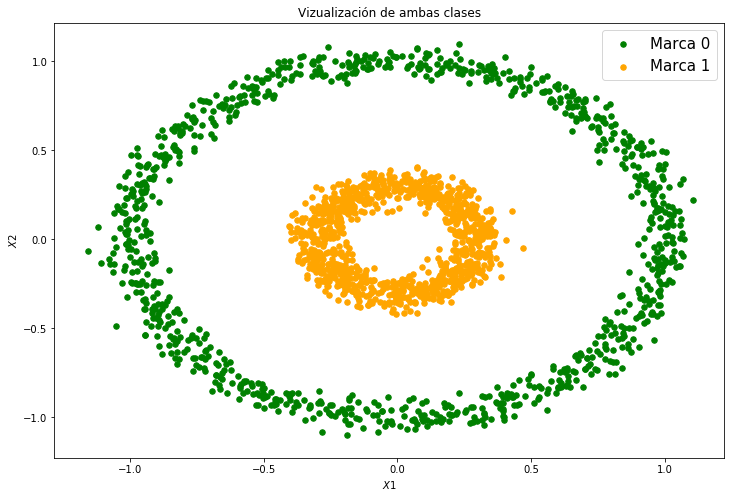

In [17]:
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x), np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp), np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],levels=[-2, 0, 2])
    plt.show()
    
#=======grafico de los datos==============
X_train,Y_train,X_test,Y_test=do_circles()
plt.figure(figsize = (12, 8))
plt.scatter([X_train[i,0] for i in range(len(Y_train)) if Y_train[i] == 0],[X_train[i,1] for i in range(len(Y_train)) if Y_train[i] == 0], s=30, c = "green")
plt.scatter([X_train[i,0] for i in range(len(Y_train)) if Y_train[i] == 1],[X_train[i,1] for i in range(len(Y_train)) if Y_train[i] == 1], s=30, c = "orange")
plt.scatter([X_test[i,0] for i in range(len(Y_test)) if Y_test[i] == 0],[X_test[i,1] for i in range(len(Y_test)) if Y_test[i] == 0], s=30, c = "green")
plt.scatter([X_test[i,0] for i in range(len(Y_test)) if Y_test[i] == 1],[X_test[i,1] for i in range(len(Y_test)) if Y_test[i] == 1], s=30, c = "orange")
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.legend(['Marca 0','Marca 1'],prop={'size': 15})
plt.title("Vizualización de ambas clases")
plt.show()


### 1.b)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1000/1000 [==============================] - 1s 921us/step - loss: 0.6936 - acc: 0.5090
Epoch 2/50
1000/1000 [==============================] - 0s 49us/step - loss: 0.6891 - acc: 0.5610
Epoch 3/50
1000/1000 [==============================] - 0s 47us/step - loss: 0.6247 - acc: 0.6260
Epoch 4/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.5772 - acc: 0.6730
Epoch 5/50
1000/1000 [==============================] - 0s 52us/step - loss: 0.5616 - acc: 0.6890
Epoch 6/50
1000/1000 [==========================

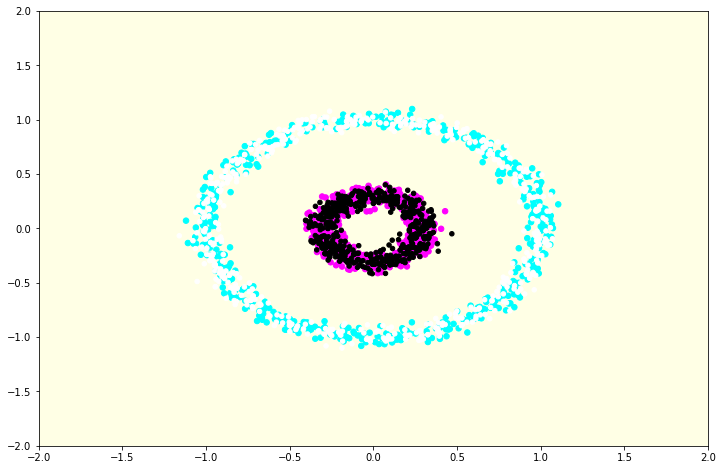

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

scores=[]

model = Sequential()
model.add(Dense(1,input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
print (model.summary())
model.fit(X_train, Y_train,epochs=50, batch_size=100, verbose=1)
score = model.evaluate(X_test, Y_test)
scores.append(score)

model = Sequential()
model.add(Dense(1,input_dim=X_train.shape[1], kernel_initializer='uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
print (model.summary())
model.fit(X_train, Y_train, batch_size=100, verbose=1)
score = model.evaluate(X_test, Y_test)
scores.append(score)

model = Sequential()
model.add(Dense(1,input_dim=X_train.shape[1], kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
print (model.summary())
model.fit(X_train, Y_train, batch_size=100, verbose=1)
score = model.evaluate(X_test, Y_test)
scores.append(score)

model = Sequential()
model.add(Dense(1,input_dim=X_train.shape[1], kernel_initializer='uniform', activation='linear'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
print (model.summary())
model.fit(X_train, Y_train, batch_size=100, verbose=1)
score = model.evaluate(X_test, Y_test)
scores.append(score)

print(scores)

plot_classifier(model,X_train,Y_train,X_test,Y_test,"ann")

### 1.c)

In [14]:
n_h=32
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
1000/1000 [==============================] - 0s 320us/step - loss: 0.6938 - acc: 0.5320
Epoch 2/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.6909 - acc: 0.5630
Epoch 3/50
1000/1000 [==============================] - 0s 16us/step - loss: 0.6828 - acc: 0.5990
Epoch 4/50
1000/1000 [==============================] - 0s 20us/step - loss: 0.6602 - acc: 0.7300
Epoch 5/50
1000/1000 [==============================] - 0s 17us/step - loss: 0.6135 - acc: 0.8330
Epoch 6/50
1000/1000 [======================

### 1.d)

Test Accuracy = 0.670000
1


C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


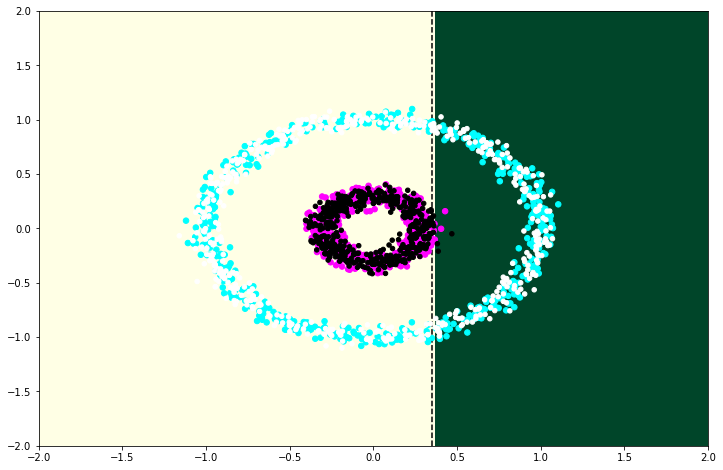

In [29]:
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print (clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

### 1.e)

Test Accuracy = 0.992000
5


C:\Users\Gabriel\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


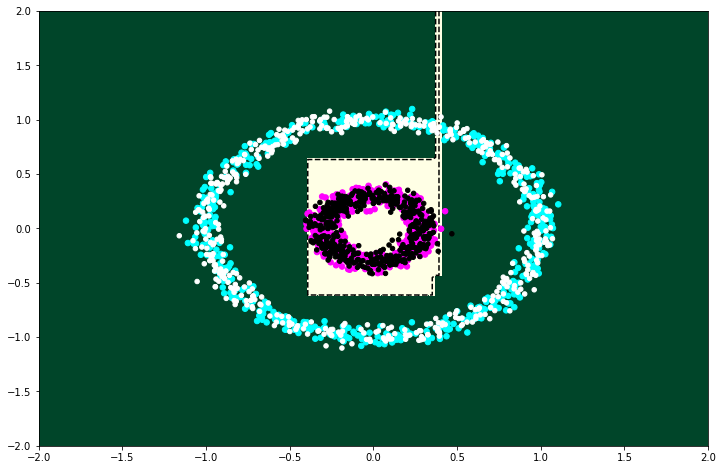

In [31]:
n_t=8
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print (clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

### 1.f)

In [34]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

### 1.g)

In [ ]:
##mira men deja te xpliko, aqui se podria usar el ese ve eme o la regresion longistica

## Pregunta 2

### 2.a)

In [36]:
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print ('\nSummary - dataframe completo:\n')
print (df.describe())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

### 2.b)

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


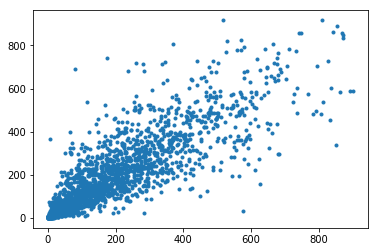

In [41]:
from sklearn.tree import DecisionTreeRegressor as Tree
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.loc[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print ("SCORE TEST=%f"%score_test)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL TEST =%f"%kagg_test)
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

### 2.c)

In [42]:
model = Tree(random_state=0,max_depth=20)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print ("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL VAL =0.546219


### 2.d)

In [44]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek #0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

### 2.e)

In [50]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.loc[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

#PASO IMPORTANTE MAS ABAJO ...

Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.loc[:,'count']

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

### 2.f)

In [51]:
model = SVR(C=1,epsilon=0.01)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL VAL =%f"%kagg_val)

KAGG EVAL TRAIN =nan
KAGG EVAL VAL =nan


C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.g)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = #define your model
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10

### 2.h)

In [ ]:
Ydf=df.loc[:,'count'] #demanda total
2 Ydf=df.loc[:,'registered'] #demanda registrada
3 Ydf=df.loc[:,'casual'] #demanda casual

### 2.i)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)

## Pregunta 3

### 3.a)

In [53]:
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)
#genere atributo tipo

### 3.b)

In [ ]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality] #then remove quality from df 
#train and test split over df

### 3.c)

In [ ]:
#ohno

### 3.d)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

### 3.e)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(base_estimator=Tree(max_depth=), n_estimators=)

### 3.f)

In [ ]:
#AAAAAAAAAH

### 3.g)

## Pregunta 4

### 4.a)

In [44]:
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('sign_mnist_train.csv')
    test = pd.read_csv('sign_mnist_test.csv')
        
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    
    x_tr,x_v,y_tr,y_v = train_test_split(x_tr, y_tr, test_size=7000, random_state=50)
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)

x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

### 4.b)

In [70]:
from sklearn.preprocessing import StandardScaler

def escalar(x_tr,x_v,x_t):
    x_tr=x_tr/255
    x_t=x_t/255
    x_v=x_v/255
    
    return (x_tr,x_v,x_t)

def estandarizar(x_tr,x_v,x_t):
    std = StandardScaler(with_mean=True)
    x_tr_scaled = pd.DataFrame(std.fit_transform(x_tr), columns=x_tr.columns)
    x_t_scaled = pd.DataFrame(std.transform(x_t), columns=x_t.columns)
    x_v_scaled = pd.DataFrame(std.transform(x_v), columns=x_v.columns)
    return (x_tr_scaled,x_v_scaled,x_t_scaled)

def graficar_loss(historia):
    datos=historia.history['val_loss']
    plt.figure(figsize = (16, 5))
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.plot([i for i in range(len(datos))],datos, 'g*-')
    plt.plot([0.2]*len(datos),'r')
    plt.legend("Error de validación")
    plt.show()

### 4.c)

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v.values,to_categorical(y_v)))

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 2s 117us/step - loss: 3.3079 - acc: 0.0461 - val_loss: 3.2076 - val_acc: 0.0463
Epoch 2/100
20455/20455 [==============================] - 1s 51us/step - loss: 3.2043 - acc: 0.0474 - val_loss: 3.2007 - val_acc: 0.0463
Epoch 3/100
20455/20455 [==============================] - 1s 51us/step - loss: 3.1989 - acc: 0.0475 - val_loss: 3.1961 - val_acc: 0.0463
Epoch 4/100
20455/20455 [==============================] - 1s 54us/step - loss: 3.1983 - acc: 0.0474 - val_loss: 3.1929 - val_acc: 0.0463
Epoch 5/100
20455/20455 [==============================] - 1s 55us/step - loss: 3.1923 - acc: 0.0474 - val_loss: 3.1905 - val_acc: 0.0463
Epoch 6/100
20455/20455 [==============================] - 1s 56us/step - loss: 3.1903 - acc: 0.0474 - val_loss: 3.1886 - val_acc: 0.0463
Epoch 7/100
20455/20455 [==============================] - 1s 53us/step - loss: 3.1887 - acc: 0.0474 - val_loss: 3.1872 - 

20455/20455 [==============================] - 1s 49us/step - loss: 3.1775 - acc: 0.0474 - val_loss: 3.1765 - val_acc: 0.0463
Epoch 60/100
20455/20455 [==============================] - 1s 49us/step - loss: 3.1774 - acc: 0.0474 - val_loss: 3.1765 - val_acc: 0.0463
Epoch 61/100
20455/20455 [==============================] - 1s 49us/step - loss: 3.1774 - acc: 0.0474 - val_loss: 3.1764 - val_acc: 0.0463
Epoch 62/100
20455/20455 [==============================] - 1s 49us/step - loss: 3.1774 - acc: 0.0474 - val_loss: 3.1764 - val_acc: 0.0463
Epoch 63/100
20455/20455 [==============================] - 1s 49us/step - loss: 3.1773 - acc: 0.0474 - val_loss: 3.1764 - val_acc: 0.0463
Epoch 64/100
20455/20455 [==============================] - 1s 49us/step - loss: 3.1773 - acc: 0.0474 - val_loss: 3.1764 - val_acc: 0.0463
Epoch 65/100
20455/20455 [==============================] - 1s 49us/step - loss: 3.1773 - acc: 0.0474 - val_loss: 3.1763 - val_acc: 0.0463
Epoch 66/100
20455/20455 [==============

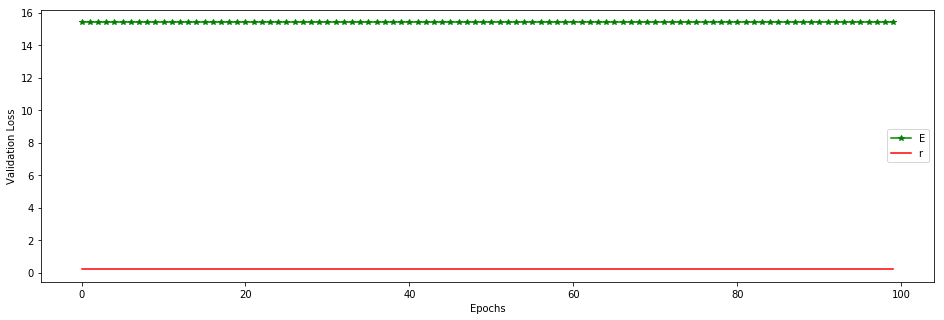

In [67]:
graficar_loss(historia)

<p>Al aplicar un modelo neuronal de 3 capas sobre los datos "brutos", se obtienen errores de validación absurdamente altos (val_loss: 15.4619), los cuales se mantenienen e una linea constante tal cual se aprecia en el gráfico. Una nueva configuración a probar será aplicando el modelo a los datos escalados según la cantidad máxima de los pixeles.</p>

In [68]:
x_tr_scaled,x_v_scaled,x_t_scaled=escalar(x_tr,x_v,x_t)

model = Sequential()
model.add(Dense(30, input_dim=x_tr_scaled.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr_scaled.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v_scaled.values,to_categorical(y_v)))

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 2s 86us/step - loss: 3.2121 - acc: 0.0431 - val_loss: 3.2054 - val_acc: 0.0459
Epoch 2/100
20455/20455 [==============================] - 1s 48us/step - loss: 3.1995 - acc: 0.0475 - val_loss: 3.1909 - val_acc: 0.0661
Epoch 3/100
20455/20455 [==============================] - 1s 48us/step - loss: 3.1837 - acc: 0.0500 - val_loss: 3.1750 - val_acc: 0.0463
Epoch 4/100
20455/20455 [==============================] - 1s 47us/step - loss: 3.1728 - acc: 0.0514 - val_loss: 3.1648 - val_acc: 0.0463
Epoch 5/100
20455/20455 [==============================] - 1s 50us/step - loss: 3.1491 - acc: 0.0829 - val_loss: 3.1059 - val_acc: 0.1094
Epoch 6/100
20455/20455 [==============================] - 1s 50us/step - loss: 2.9683 - acc: 0.1103 - val_loss: 2.7971 - val_acc: 0.1493
Epoch 7/100
20455/20455 [==============================] - 1s 49us/step - loss: 2.7714 - acc: 0.1397 - val_loss: 2.5473 - v

20455/20455 [==============================] - 1s 49us/step - loss: 0.3664 - acc: 0.8843 - val_loss: 0.3699 - val_acc: 0.8716
Epoch 60/100
20455/20455 [==============================] - 1s 50us/step - loss: 0.3024 - acc: 0.9082 - val_loss: 3.5922 - val_acc: 0.3776
Epoch 61/100
20455/20455 [==============================] - 1s 48us/step - loss: 0.3666 - acc: 0.8924 - val_loss: 0.2173 - val_acc: 0.9403
Epoch 62/100
20455/20455 [==============================] - 1s 47us/step - loss: 0.3225 - acc: 0.9052 - val_loss: 0.4201 - val_acc: 0.8589
Epoch 63/100
20455/20455 [==============================] - 1s 54us/step - loss: 0.2115 - acc: 0.9376 - val_loss: 0.5327 - val_acc: 0.7950
Epoch 64/100
20455/20455 [==============================] - 1s 52us/step - loss: 0.6423 - acc: 0.8217 - val_loss: 0.1952 - val_acc: 0.9501
Epoch 65/100
20455/20455 [==============================] - 1s 51us/step - loss: 0.1826 - acc: 0.9495 - val_loss: 0.1679 - val_acc: 0.9566
Epoch 66/100
20455/20455 [==============

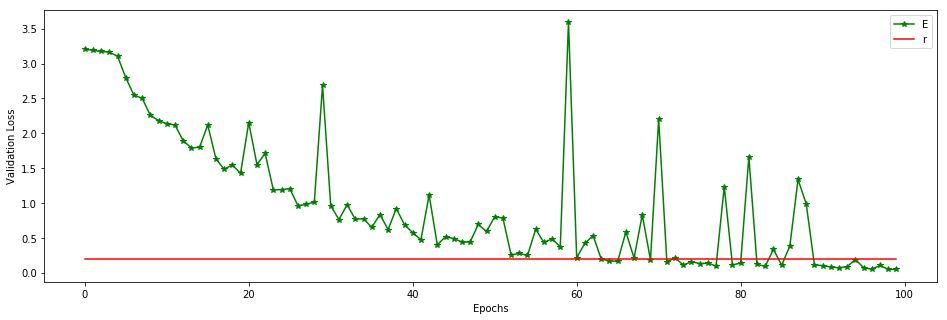

In [71]:
graficar_loss(historia)

<p>Se logra una considerable disminución del error de validación, llegando a estar por debajo del valor 0,2. Sin embargo, se buscará estabilizar este error para asegurar que no supere el umbral ya mencionado. Para esto, se modificaran la cantidad de dimensiones que se crean entre las neuronas, aumentando las de entrada y disminuyendolas en las posteriores.</p>

In [87]:
model = Sequential()
model.add(Dense(50, input_dim=x_tr_scaled.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(40, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr_scaled.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1,validation_data=(x_v_scaled.values,to_categorical(y_v)))

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 2s 101us/step - loss: 3.2089 - acc: 0.0448 - val_loss: 3.1968 - val_acc: 0.0463
Epoch 2/100
20455/20455 [==============================] - 1s 56us/step - loss: 3.1854 - acc: 0.0474 - val_loss: 3.1746 - val_acc: 0.0463
Epoch 3/100
20455/20455 [==============================] - 1s 58us/step - loss: 3.1698 - acc: 0.0547 - val_loss: 3.1585 - val_acc: 0.0806
Epoch 4/100
20455/20455 [==============================] - 1s 57us/step - loss: 3.1041 - acc: 0.0909 - val_loss: 2.9737 - val_acc: 0.1054
Epoch 5/100
20455/20455 [==============================] - 1s 59us/step - loss: 2.8889 - acc: 0.1055 - val_loss: 2.8954 - val_acc: 0.0930
Epoch 6/100
20455/20455 [==============================] - 1s 68us/step - loss: 2.7954 - acc: 0.1231 - val_loss: 3.3535 - val_acc: 0.0659
Epoch 7/100
20455/20455 [==============================] - 1s 69us/step - loss: 2.6958 - acc: 0.1569 - val_loss: 2.6291 - 

20455/20455 [==============================] - 1s 66us/step - loss: 0.1085 - acc: 0.9767 - val_loss: 0.0853 - val_acc: 0.9900
Epoch 60/100
20455/20455 [==============================] - 1s 61us/step - loss: 0.0793 - acc: 0.9868 - val_loss: 0.0875 - val_acc: 0.9827
Epoch 61/100
20455/20455 [==============================] - 1s 67us/step - loss: 0.0678 - acc: 0.9907 - val_loss: 0.0631 - val_acc: 0.9936
Epoch 62/100
20455/20455 [==============================] - 1s 60us/step - loss: 0.4248 - acc: 0.8879 - val_loss: 0.0951 - val_acc: 0.9803
Epoch 63/100
20455/20455 [==============================] - 1s 63us/step - loss: 0.3364 - acc: 0.9132 - val_loss: 0.1447 - val_acc: 0.9587
Epoch 64/100
20455/20455 [==============================] - 1s 68us/step - loss: 0.2361 - acc: 0.9413 - val_loss: 0.2248 - val_acc: 0.9326
Epoch 65/100
20455/20455 [==============================] - 1s 58us/step - loss: 0.2165 - acc: 0.9439 - val_loss: 0.1058 - val_acc: 0.9789
Epoch 66/100
20455/20455 [==============

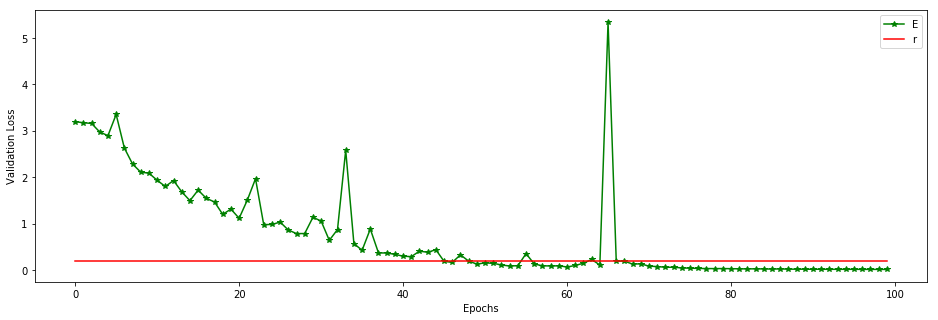

In [88]:
graficar_loss(historia)

<p>Se logra apreciar una estabilización de los valores de error de validación, donde estos convergen por debajo de 0,2. Con esta configuración, se puede proceder a obtener el error de test.</p>

In [119]:
l=escalar(x_tr,x_v,x_t)
x_tr_scaled,x_v_scaled,x_t_scaled=estandarizar(l[0],l[1],l[2])

model = Sequential()
model.add(Dense(100, input_dim=x_tr_scaled.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(25, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
historia = model.fit(x_tr_scaled.values, to_categorical(y_tr), epochs=100, batch_size=128, verbose=1)
scores = model.evaluate(x_t_scaled, to_categorical(y_t))
loss = scores[0]
print ("El error de test es de",loss)

Epoch 1/100
20455/20455 [==============================] - 3s 135us/step - loss: 3.2106 - acc: 0.0637
Epoch 2/100
20455/20455 [==============================] - 1s 63us/step - loss: 3.1901 - acc: 0.1175
Epoch 3/100
20455/20455 [==============================] - 1s 65us/step - loss: 3.0268 - acc: 0.1234
Epoch 4/100
20455/20455 [==============================] - 1s 64us/step - loss: 2.3701 - acc: 0.2496
Epoch 5/100
20455/20455 [==============================] - 1s 66us/step - loss: 1.6156 - acc: 0.4421
Epoch 6/100
20455/20455 [==============================] - 1s 66us/step - loss: 1.0879 - acc: 0.6267
Epoch 7/100
20455/20455 [==============================] - 1s 64us/step - loss: 0.6616 - acc: 0.7786
Epoch 8/100
20455/20455 [==============================] - 1s 64us/step - loss: 0.4106 - acc: 0.8725
Epoch 9/100
20455/20455 [==============================] - 1s 64us/step - loss: 0.3147 - acc: 0.9203
Epoch 10/100
20455/20455 [==============================] - 1s 65us/step - loss: 0.1053 - 

20455/20455 [==============================] - 1s 63us/step - loss: 3.5249e-04 - acc: 1.0000
Epoch 80/100
20455/20455 [==============================] - 1s 63us/step - loss: 3.4603e-04 - acc: 1.0000
Epoch 81/100
20455/20455 [==============================] - 1s 63us/step - loss: 3.4016e-04 - acc: 1.0000
Epoch 82/100
20455/20455 [==============================] - 1s 63us/step - loss: 3.3443e-04 - acc: 1.0000
Epoch 83/100
20455/20455 [==============================] - 1s 64us/step - loss: 3.2861e-04 - acc: 1.0000
Epoch 84/100
20455/20455 [==============================] - 1s 63us/step - loss: 3.2329e-04 - acc: 1.0000
Epoch 85/100
20455/20455 [==============================] - 1s 63us/step - loss: 3.1794e-04 - acc: 1.0000
Epoch 86/100
20455/20455 [==============================] - 1s 63us/step - loss: 3.1287e-04 - acc: 1.0000
Epoch 87/100
20455/20455 [==============================] - 1s 64us/step - loss: 3.0801e-04 - acc: 1.0000
Epoch 88/100
20455/20455 [==============================] -

### 4.d)

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=model.predict(x_t)
confusion_matrix(to_categorical(y_t),y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

### 4.e)

In [ ]:
from sklearn.svm import SVC as SVM

svm= SVM()
svm.set_params(kernel='rbf')
svm.fit(x_tr,y_tr)
y_pred = svm.predict(x_t)
score = 1-accuracy_score(y_t, y_pred)
print(score)

#x_tr_scaled,x_v_scaled,x_t_scaled=escalar(x_tr,x_v,x_t)
#x_tr_scaled,x_v_scaled,x_t_scaled=estandarizar(x_tr_scaled,x_v_scaled,x_t_scaled)

### 4.f)